# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets
import regex as re
import string
import contractions
from spellchecker import SpellChecker
from wordcloud import WordCloud

In [3]:
import nltk
import nltk.corpus
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer

In [4]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to /home/codespace/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data

In [5]:
df = pd.read_csv('/workspaces/tswift_lyrics/genius_lyrics_collection/tswift_lyrics.csv')
df.head()

,Album,Song Name,Lyrics
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...
2,Taylor Swift,Cold as You,you have a way of coming easily to me and when...
3,Taylor Swift,I'm Only Me When I'm With You,friday night beneath the stars in a field behi...
4,Taylor Swift,Invisible,she cant see the way your eyes light up when y...


In [6]:
df.describe()

,Album,Song Name,Lyrics
count,229,229,229
unique,15,229,229
top,The Tortured Poets Department The Anthology,A Perfectly Good Heart,why would you wanna break a perfectly good hea...
freq,31,1,1


# Text Cleaning

In [7]:
# note: punctuation was removed and words were made lowercase after downloading

# remove non-ASCII charaacters and contractions
# including 'wanna' and 'gonna'; 'na' was previously the sixth most frequently used word
df['clean_lyrics'] = df['Lyrics'].str.encode('ascii', 'ignore').str.decode('ascii').apply(lambda x: [contractions.fix(word) for word in x.split()]).apply(lambda x: ', '.join(x))

df.head()

,Album,Song Name,Lyrics,clean_lyrics
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,"why, would, you, want to, break, a, perfectly,..."
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,"i, do not, know, what, i, want, so, do not, as..."
2,Taylor Swift,Cold as You,you have a way of coming easily to me and when...,"you, have, a, way, of, coming, easily, to, me,..."
3,Taylor Swift,I'm Only Me When I'm With You,friday night beneath the stars in a field behi...,"friday, night, beneath, the, stars, in, a, fie..."
4,Taylor Swift,Invisible,she cant see the way your eyes light up when y...,"she, cannot, see, the, way, your, eyes, light,..."


In [8]:
# check for misspelled words

# initialize spell checker
spell = SpellChecker()

# find misspelled words
misspelled = spell.unknown(df['clean_lyrics'])
misspelled_list = list(misspelled)

if len(misspelled_list) == 0:
    print('No misspelled words!')
else:
    print(misspelled_list)
    for word in misspelled:
        print(spell.corrections(word))
        print(spell.candidates(word))

No misspelled words!


## Tokenization and Lemmatization

In [9]:
# define English words and stopwords
english_words = set(words.words())
stop = stopwords.words('english')

print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# remove stopwords and tokenize lyrics
# create new column for tokenized lyrics
# len(word) > 2 removes words like 'oh' (previously most common word)
df['tokenized_lyrics'] = df['clean_lyrics'].apply(nltk.word_tokenize)
df['tokenized_lyrics'] = df['tokenized_lyrics'].apply(lambda words: [word for word in words
                                                                     if word not in stop
                                                                     and len(word) > 2])
                                                                     
# initialize wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

# create new column for lemmatized lyrics
df['lemmatized_lyrics'] = df['tokenized_lyrics'].apply(lambda lst:[lemmatizer.lemmatize(word) for word in lst])                                                                     

df.head()

,Album,Song Name,Lyrics,clean_lyrics,tokenized_lyrics,lemmatized_lyrics
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,"why, would, you, want to, break, a, perfectly,...","[would, want, break, perfectly, good, heart, w...","[would, want, break, perfectly, good, heart, w..."
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,"i, do not, know, what, i, want, so, do not, as...","[know, want, ask, still, trying, figure, know,...","[know, want, ask, still, trying, figure, know,..."
2,Taylor Swift,Cold as You,you have a way of coming easily to me and when...,"you, have, a, way, of, coming, easily, to, me,...","[way, coming, easily, take, take, best, start,...","[way, coming, easily, take, take, best, start,..."
3,Taylor Swift,I'm Only Me When I'm With You,friday night beneath the stars in a field behi...,"friday, night, beneath, the, stars, in, a, fie...","[friday, night, beneath, stars, field, behind,...","[friday, night, beneath, star, field, behind, ..."
4,Taylor Swift,Invisible,she cant see the way your eyes light up when y...,"she, cannot, see, the, way, your, eyes, light,...","[see, way, eyes, light, smile, never, notice, ...","[see, way, eye, light, smile, never, notice, s..."


In [11]:
# save the dataframe as csv
df.to_csv('tswift_lyrics_clean.csv')

## Series of All Words

In [12]:
# join words in 'lemmatized_lyric' column to single list
lyric_words = df['lemmatized_lyrics'].explode().to_list()

# create pandas series from list
lyric_series = pd.Series(lyric_words)

print(len(lyric_words))
print(lyric_words[:100])

37097
['would', 'want', 'break', 'perfectly', 'good', 'heart', 'would', 'want', 'take', 'love', 'tear', 'apart', 'would', 'want', 'make', 'first', 'scar', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'maybe', 'seen', 'sign', 'read', 'writing', 'wall', 'realized', 'distance', 'eye', 'would', 'one', 'fall', 'matter', 'say', 'still', 'believe', 'would', 'walk', 'away', 'make', 'sense', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'would', 'want', 'take', 'love', 'tear', 'apart', 'would', 'want', 'make', 'first', 'scar', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'unbroken', 'anymore', 'unbroken', 'anymore', 'get', 'back', 'way', 'would', 'want', 'break', 'perfectly', 'good', 'heart', 'would', 'want', 'take', 'love', 'tear', 'apart', 'would', 'want', 'make', 'first', 'scar', 'would', 'want', 'break', 'would', 'want', 'break', 'would', 'want', 'break']


# Most Frequent Words

In [13]:
# count no. of occurences of each word in lyric_series
word_count = lyric_series.value_counts().reset_index()

# name columns
word_count.columns = ['Word', 'Count']

# show word count table
word_count.head(15).style.background_gradient()

,Word,Count
0,like,674
1,know,638
2,never,430
3,love,429
4,want,427
5,time,410
6,one,368
7,back,328
8,would,327
9,say,324


## Most Freq. Words - Bar Chart

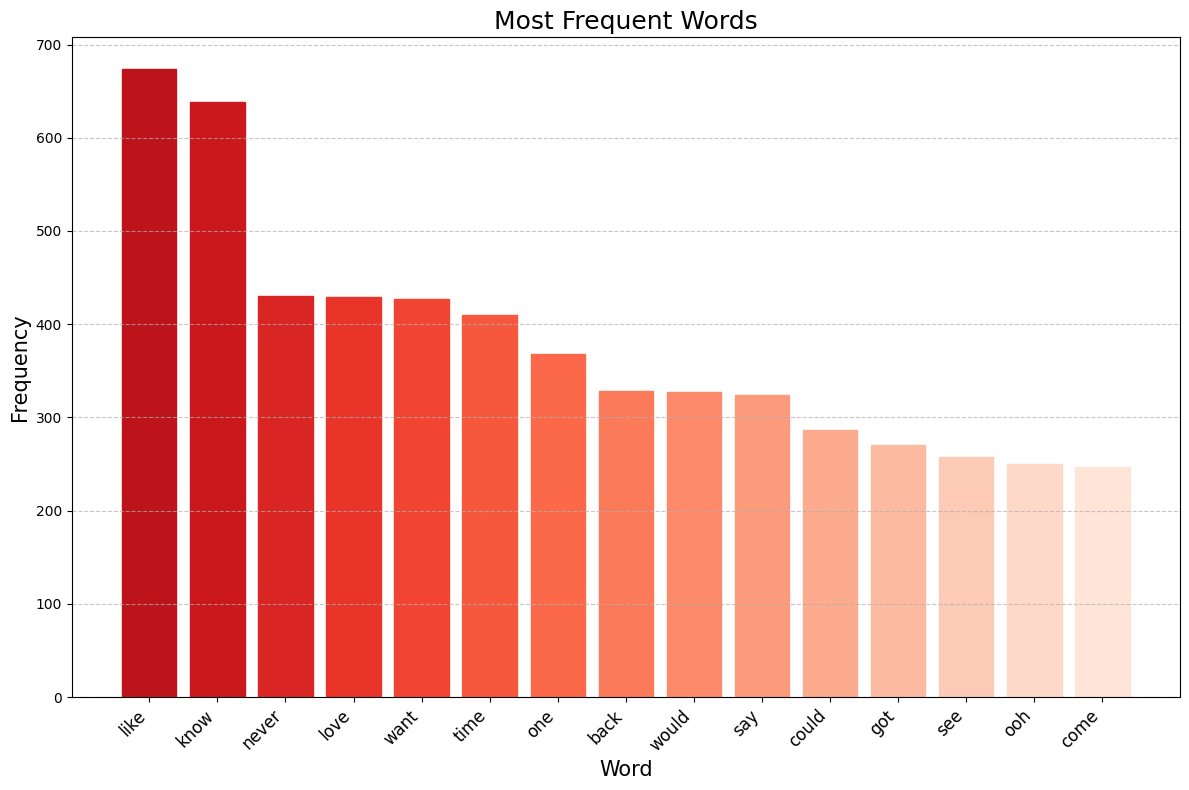

In [14]:
# define colors using a colormap
colors = plt.cm.Reds(np.linspace(0.8, 0.1, len(word_count['Word'][:15])))

# plot the top 15 most frequent words
plt.figure(figsize=(12, 8))
bars = plt.bar(word_count['Word'][:15],
               word_count['Count'][:15],
               color=colors
               )

# add color gradient to bars
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Most Frequent Words', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Most Freq. Words - Word Cloud

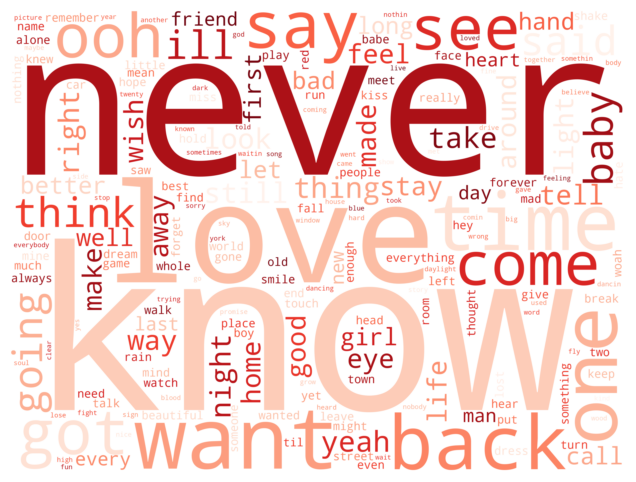

In [15]:
# define text to use
text = ' '.join(lyric_words)

# generate the WordCloud
wordcloud = WordCloud(relative_scaling = 0.3,
                    min_font_size = 1,
                    background_color = 'white',
                    width = 1024,
                    height = 768,
                    max_words = 200,
                    colormap = 'Reds',
                    scale = 3,
                    font_step = 4,
                    collocations = False,
                    margin = 5).generate(text)

# display WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# note: does not show 'like'

## Specific Words

In [39]:
# function to find words in list
def find_words(word: str, pattern: str) -> int:
    return len(re.findall(pattern, word.lower()))

# functions to graph number of occurences of words in list by album
# static stacked bar chart
def plot_stacked_bar_graph(plotdata, legend, title, ylabel):
    plotdata.plot(kind='bar', stacked=True, figsize=(16, 12)).legend(loc='upper left', ncol=3, title=legend)
    # plot legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, title=legend)
    plt.subplots_adjust(right=0.7)
    # add titles
    plt.title(title, fontsize=20)
    plt.xlabel('Album', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    # show plot
    plt.show()
    
# interactive stacked bar chart
def plot_interactive_bar_graph(data, legend, ylabel, title):
    fig = px.bar(data,
                labels={'variable' : legend,
                        'value' : ylabel},
                title=title,
                )
    fig.show()

### Swear Words

In [40]:
# create new dataframe for understanding swear words
df_swears = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of swear words
swears_list = [' hell ', ' bitch ', ' bitches ', ' bitchin ', ' asshole ', ' shit ', ' shitty ', ' shitstorm ',
                ' damn ', ' damned ', ' goddamn ', ' pissed ', ' fuck ', ' fuckin ', ' fucking ', ' fucked ',
                ' sexy ', ' whore ', ' slut ', ' dickhead ', ' godforsaken ']

# function to count swear words by song
def find_words(word: str, pattern: str) -> int:
    return len(re.findall(pattern, word.lower()))

# loop through each string in swears_list
# apply find_swear_words function
for col in swears_list:
    df_swears[col] = df_swears['Lyrics'].apply(find_words, pattern=col)

df_swears.tail()

,Album,Song Name,Lyrics,hell,bitch,bitches,bitchin,asshole,shit,shitty,...,pissed,fuck,fuckin,fucking,fucked,sexy,whore,slut,dickhead,godforsaken
224,The Tortured Poets Department The Anthology,The Tortured Poets Department,you left your typewriter at my apartment strai...,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
225,The Tortured Poets Department The Anthology,Who's Afraid of Little Old Me,the whos who of whos that is poised for the at...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,The Tortured Poets Department The Anthology,​​imgonnagetyouback,yeah lilac short skirt the one that fits me l...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,The Tortured Poets Department The Anthology,​​thanK you aIMee,when i picture my hometown theres a bronze spr...,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
228,The Tortured Poets Department The Anthology,loml,whos gonna stop us from waltzing back into rek...,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# create new reduced dataframe
df_swears_reduced = df_swears[['Album', ' hell ', ' bitch ', ' bitches ', ' bitchin ', ' asshole ', ' shit ', ' shitty ', ' shitstorm ',
                                ' damn ', ' damned ', ' goddamn ', ' pissed ', ' fuck ', ' fuckin ', ' fucking ', ' fucked ', ' sexy ', ' whore ',
                                ' slut ', ' dickhead ', ' godforsaken ']].copy()

# remove spaces from column names and combine similar swear words
df_swears_reduced['hell'] = df_swears_reduced[[' hell ']]
df_swears_reduced['bitch'] = df_swears_reduced[[' bitch ', ' bitches ', ' bitchin ']].sum(axis=1)
df_swears_reduced['asshole'] = df_swears_reduced[[' asshole ']]
df_swears_reduced['shit'] = df_swears_reduced[[' shit ', ' shitty ', ' shitstorm ']].sum(axis=1)
df_swears_reduced['damn'] = df_swears_reduced[[' damn ', ' damned ', ' goddamn ']].sum(axis=1)
df_swears_reduced['pissed'] = df_swears_reduced[[' pissed ']]
df_swears_reduced['fuck'] = df_swears_reduced[[' fuck ', ' fuckin ', ' fucking ', ' fucked ']].sum(axis=1)
df_swears_reduced['sexy'] = df_swears_reduced[[' sexy ']]
df_swears_reduced['whore'] = df_swears_reduced[[' whore ']]
df_swears_reduced['slut'] = df_swears_reduced[[' slut ']]
df_swears_reduced['dickhead'] = df_swears_reduced[[' dickhead ']]
df_swears_reduced['godforsaken'] = df_swears_reduced[[' godforsaken ']]

# drop now-unnecessary columns
df_swears_reduced = df_swears_reduced.drop([' hell ', ' bitch ', ' bitches ', ' bitchin ', ' asshole ', ' shit ', ' shitty ',
                                            ' shitstorm ', ' damn ', ' damned ', ' goddamn ', ' pissed ', ' fuck ', ' fuckin ', ' fucking ',
                                            ' fucked ', ' sexy ', ' whore ', ' slut ', ' dickhead ', ' godforsaken '],
                                            axis=1)

# combine album rows
df_swears_reduced = df_swears_reduced.groupby('Album').sum()

df_swears_reduced

,hell,bitch,asshole,shit,damn,pissed,fuck,sexy,whore,slut,dickhead,godforsaken
Album,,,,,,,,,,,,
1989 Deluxe,2,0,0,0,1,0,0,0,0,0,0,0
1989 Taylors Version,0,0,0,0,0,0,0,0,0,4,0,0
Fearless Platinum Edition,0,0,0,0,0,0,0,0,0,0,0,0
Fearless Taylors Version,0,0,0,0,0,0,0,0,0,0,0,0
Lover,2,2,0,0,1,0,0,0,0,0,0,0
Midnights The Til Dawn Edition,3,0,1,14,12,0,7,1,0,0,1,0
Red Deluxe Edition,2,0,0,0,0,0,0,0,0,0,0,0
Red Taylors Version,2,0,0,1,0,0,1,0,0,0,0,0
Reputation,0,0,0,1,2,0,0,0,0,0,0,0


#### Swear Words - Bar Charts

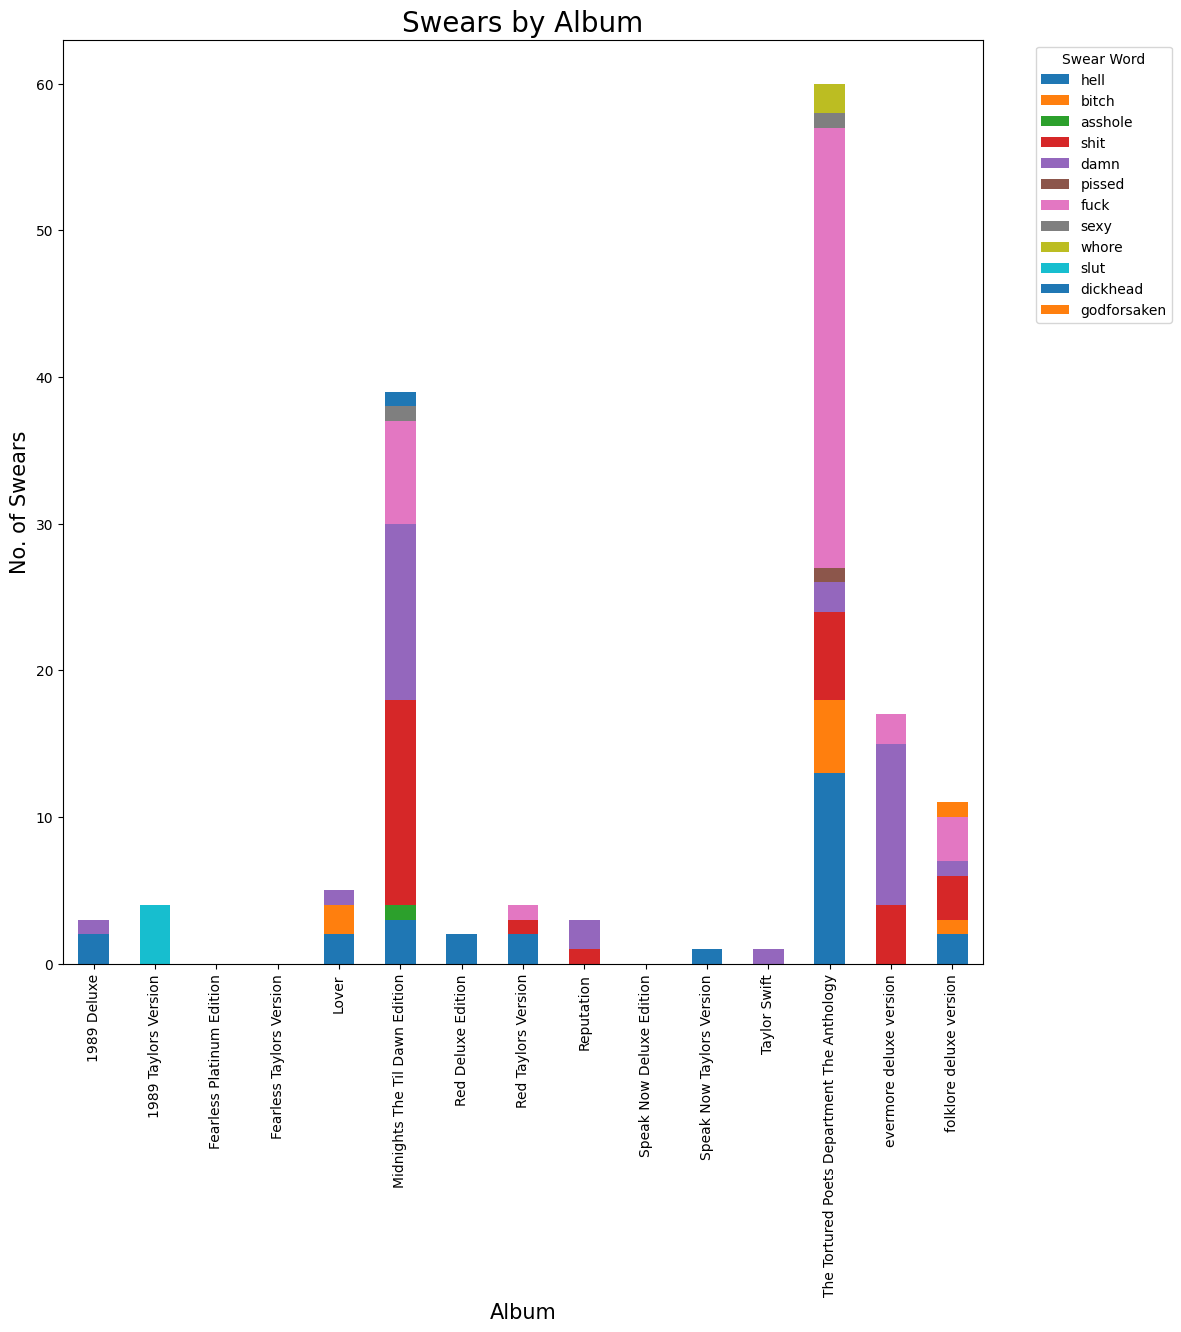

In [44]:
# number of swear words by album color-coded by word

# define data
plotdata = df_swears_reduced[['hell', 'bitch', 'asshole', 'shit', 'damn', 'pissed', 'fuck', 'sexy', 'whore', 'slut', 'dickhead', 'godforsaken']]

# call function to create static stacked bar graph
plot_stacked_bar_graph(plotdata, 'Swear Word', 'Swears by Album', 'No. of Swears')

# call function to create interactive stacked bar graph
plot_interactive_bar_graph(df_swears_reduced, 'Swear Word', 'No. of Words', 'Swear Words by Album')

### References to Drugs and Alcohol

In [20]:
# create new dataframe for understanding drug references
df_drugs = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of drug references
drug_list = [' alcohol ', ' alcoholic ', ' bar ', ' drink ', ' drinkin ', ' drinking ', ' drunk ',
            ' sober ', ' beer ', ' beers ', ' wine ', ' rosé ', ' merlot ', ' champagne ', ' dom pérignon ',
            ' liquor ', ' whiskey ', ' old fashioned ', ' patrón ', ' island breeze ', 
            ' drug ', ' drugs ', ' weed ', ' smoke ', ' smoking ', ' smokin ', ' smoked ', ' stoned ',
            ' overdose ', ' narcotics ', ' heroin ', ' dopamine ', ' pills ', ' doin lines ']

# function to count drug references by song
def find_words(word: str, pattern: str) -> int:
    return len(re.findall(pattern, word.lower()))

# loop through each string in drug_list
# apply find_drug_words function
for col in drug_list:
    df_drugs[col] = df_drugs['Lyrics'].apply(find_words, pattern=col)

df_drugs.head(2)

,Album,Song Name,Lyrics,alcohol,alcoholic,bar,drink,drinkin,drinking,drunk,...,smoking,smokin,smoked,stoned,overdose,narcotics,heroin,dopamine,pills,doin lines
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# create new reduced dataframe
df_drug_reduced = df_drugs[['Album', ' alcohol ', ' alcoholic ', ' bar ', ' drink ', ' drinkin ', ' drinking ',
                            ' drunk ', ' sober ', ' beer ', ' beers ', ' wine ', ' rosé ', ' merlot ', ' champagne ', ' dom pérignon ',
                            ' liquor ', ' whiskey ', ' old fashioned ', ' patrón ', ' island breeze ', 
                            ' drug ', ' drugs ', ' weed ', ' smoke ', ' smoking ', ' smokin ', ' smoked ', ' stoned ',
                            ' overdose ', ' narcotics ', ' heroin ', ' dopamine ', ' pills ', ' doin lines ']].copy()

# remove spaces and combine similar swear words
df_drug_reduced['alcohol'] = df_drug_reduced[[' alcohol ', ' alcoholic ']].sum(axis=1)
df_drug_reduced['bar'] = df_drug_reduced[[' bar ']]
df_drug_reduced['drink'] = df_drug_reduced[[' drink ', ' drinkin ', ' drinking ', ' drunk ']].sum(axis=1)
df_drug_reduced['sober'] = df_drug_reduced[[' sober ']]
df_drug_reduced['beer'] = df_drug_reduced[[' beer ', ' beers ']].sum(axis=1)
df_drug_reduced['wine'] = df_drug_reduced[[' wine ', ' rosé ', ' merlot ']].sum(axis=1)
df_drug_reduced['champagne'] = df_drug_reduced[[' champagne ', ' dom pérignon ']].sum(axis=1)
df_drug_reduced['liquor'] = df_drug_reduced[[' liquor ', ' whiskey ', ' patrón ']].sum(axis=1)
df_drug_reduced['mixed drinks'] = df_drug_reduced[[' old fashioned ', ' island breeze ']].sum(axis=1)
df_drug_reduced['drug'] = df_drug_reduced[[' drug ', ' drugs ']].sum(axis=1)
df_drug_reduced['weed'] = df_drug_reduced[[' weed ']]
df_drug_reduced['smoke'] = df_drug_reduced[[' smoke ', ' smoking ', ' smokin ', ' smoked ']].sum(axis=1)
df_drug_reduced['stoned'] = df_drug_reduced[[' stoned ']]
df_drug_reduced['overdose'] = df_drug_reduced[[' overdose ']]
df_drug_reduced['narcotics'] = df_drug_reduced[[' narcotics ']]
df_drug_reduced['heroin'] = df_drug_reduced[[' heroin ']]
df_drug_reduced['dopamine'] = df_drug_reduced[[' dopamine ']]
df_drug_reduced['pills'] = df_drug_reduced[[' pills ']]
df_drug_reduced['doin lines'] = df_drug_reduced[[' doin lines ']]

# drop now-unnecessary columns
df_drug_reduced = df_drug_reduced.drop([' alcohol ', ' alcoholic ', ' bar ', ' drink ', ' drinkin ', ' drinking ', ' drunk ',
                                        ' sober ', ' beer ', ' beers ', ' wine ', ' rosé ', ' merlot ', ' champagne ', ' dom pérignon ',
                                        ' liquor ', ' whiskey ', ' old fashioned ', ' patrón ', ' island breeze ', 
                                        ' drug ', ' drugs ', ' weed ', ' smoke ', ' smoking ', ' smokin ', ' smoked ', ' stoned ',
                                        ' overdose ', ' narcotics ', ' heroin ', ' dopamine ', ' pills ', ' doin lines '
                                        ], axis=1)

# combine album rows
df_drug_reduced = df_drug_reduced.groupby('Album').sum()

df_drug_reduced.head(2)

,alcohol,bar,drink,sober,beer,wine,champagne,liquor,mixed drinks,drug,weed,smoke,stoned,overdose,narcotics,heroin,dopamine,pills,doin lines
Album,,,,,,,,,,,,,,,,,,,
1989 Deluxe,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1989 Taylors Version,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Drugs & Alcohol - Bar Charts

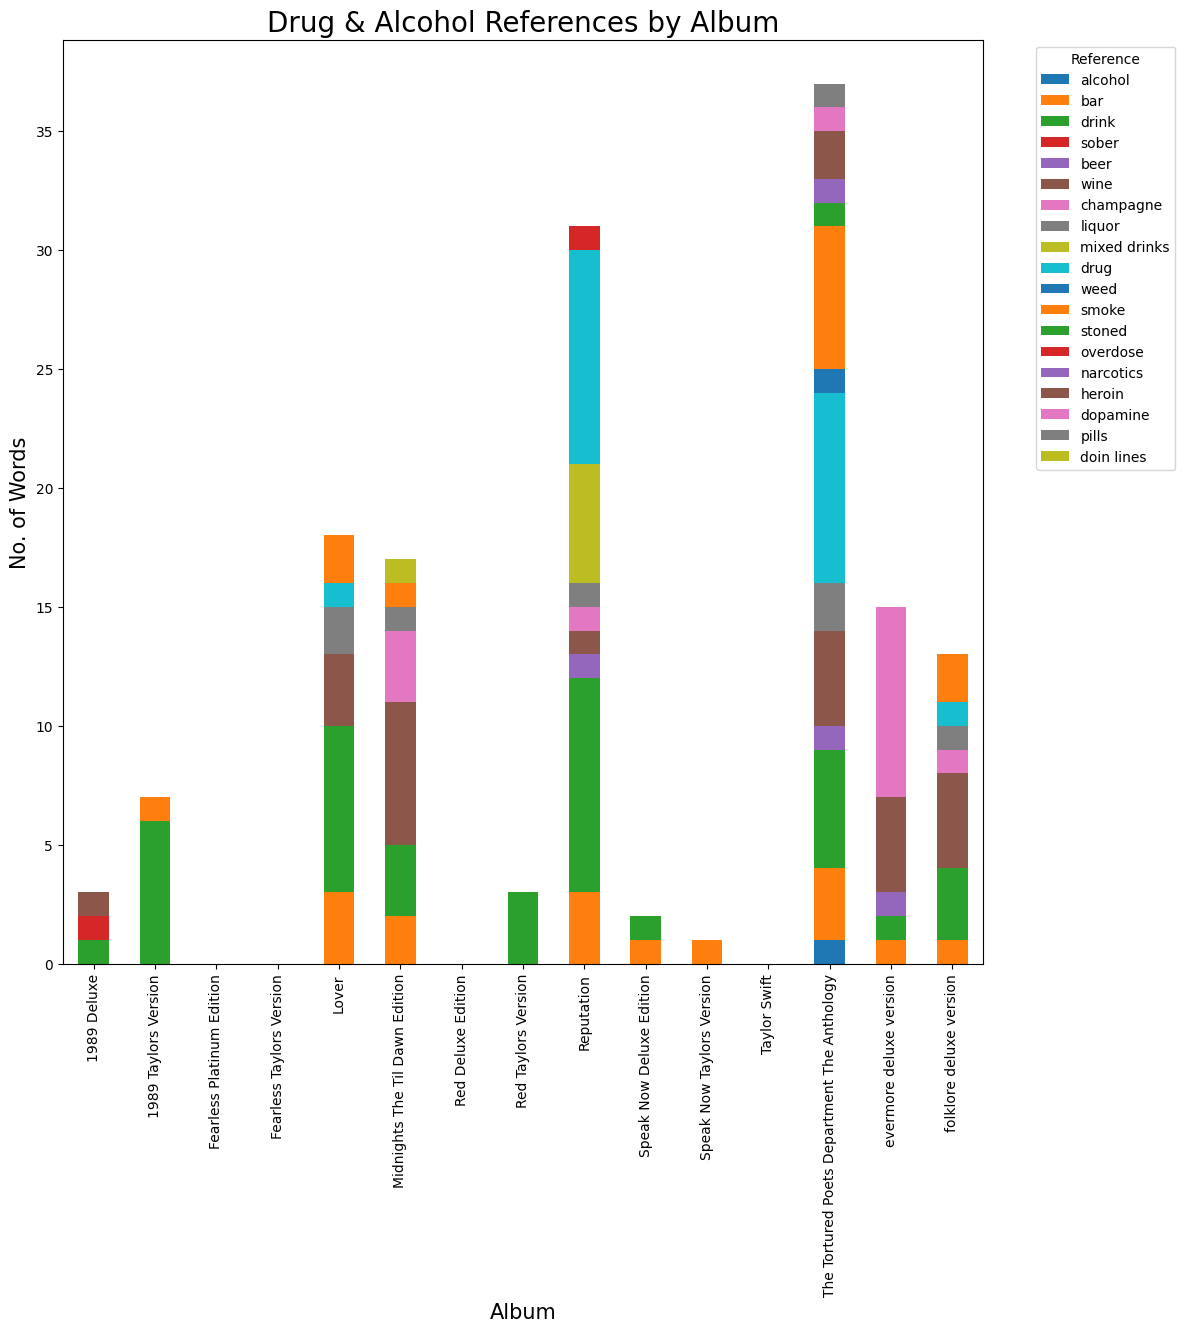

In [46]:
# number of drug references by album color-coded by word

# define data
plotdata = df_drug_reduced[['alcohol', 'bar', 'drink', 'sober', 'beer', 'wine', 'champagne', 'liquor', 'mixed drinks', 'drug', 'weed',
                            'smoke', 'stoned', 'overdose', 'narcotics', 'heroin', 'dopamine', 'pills', 'doin lines']]

# call function to create static stacked bar graph
plot_stacked_bar_graph(plotdata, 'Reference', 'Drug & Alcohol References by Album', 'No. of Words')

# call function to create interactive stacked bar graph
plot_interactive_bar_graph(df_drug_reduced, 'Reference', 'No. of Words', 'Drug & Alcohol References by ALbum')

### References to Religion

In [23]:
# create new dataframe for understanding religious words
df_rlgn = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of religious words
rlgn_list = [' amen ', ' christian ', ' church ', ' faith ', ' faithless ', ' god ', ' gods ', ' lord ', ' devil ', ' devils ',
            ' angel ', ' angels ', ' demons ', ' saint ', ' saintly ', ' jesus ', ' holy ', ' pray ', ' praying ', ' prayer ',
            ' altar ', ' sin ', ' guilty ', ' guilt ', ' hell ', ' heaven ', ' heavenly ', ' halo ', ' preacher ', ' christmas ',
            ' methodist ', ' jehovahs witness ', ' hallelujah ', ' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ',
            ' priest ', ' confess ', ' confessions ', ' religion ', ' religions ', ' religious ', ' epiphany ', ' grace ', ' sacred ',
            ' worship ', ' worshipping ', ' soul ', ' spirit ', ' prophecy ', ' miracle ', ' bless ', ' crucify ', ' temple ',
            ' eve ', ' exorcise ']

# function to count religious words by song
def find_words(word: str, pattern: str) -> int:
    return len(re.findall(pattern, word.lower()))

# loop through each string in rlgn_list
# apply find_rlgn_words function
for col in rlgn_list:
    df_rlgn[col] = df_rlgn['Lyrics'].apply(find_words, pattern=col)

df_rlgn.head(2)

,Album,Song Name,Lyrics,amen,christian,church,faith,faithless,god,gods,...,worshipping,soul,spirit,prophecy,miracle,bless,crucify,temple,eve,exorcise
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# create new reduced dataframe
df_rlgn_reduced = df_rlgn[['Album', ' amen ', ' christian ', ' church ', ' faith ', ' faithless ', ' god ', ' gods ',
                            ' lord ', ' devil ', ' devils ', ' angel ', ' angels ', ' demons ', ' saint ', ' saintly ',
                            ' jesus ', ' holy ', ' pray ', ' praying ', ' prayer ', ' altar ', ' sin ', ' guilty ', ' guilt ',
                            ' hell ', ' heaven ', ' heavenly ', ' halo ', ' preacher ', ' christmas ', ' methodist ',
                            ' jehovahs witness ', ' hallelujah ', ' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ',
                            ' priest ', ' confess ', ' confessions ', ' religion ', ' religions ', ' religious ', ' epiphany ',
                            ' grace ', ' sacred ', ' worship ', ' worshipping ', ' soul ', ' spirit ', ' prophecy ', ' miracle ',
                            ' bless ', ' crucify ', ' temple ', ' eve ', ' exorcise '
                            ]].copy()

# remove spaces and combine similar swear words
df_rlgn_reduced['Amen'] = df_rlgn_reduced[[' amen ']]
df_rlgn_reduced['Christian'] = df_rlgn_reduced[[' christian ', ' methodist ', ' jehovahs witness ']].sum(axis=1)
df_rlgn_reduced['church'] = df_rlgn_reduced[[' church ']]
df_rlgn_reduced['faith'] = df_rlgn_reduced[[' faith ', ' faithless ']].sum(axis=1)
df_rlgn_reduced['God'] = df_rlgn_reduced[[' god ', ' gods ']].sum(axis=1)
df_rlgn_reduced['Lord'] = df_rlgn_reduced[[' lord ']]
df_rlgn_reduced['Jesus'] = df_rlgn_reduced[[' jesus ']]
df_rlgn_reduced['saint'] = df_rlgn_reduced[[' saint ', ' saintly ']].sum(axis=1)
df_rlgn_reduced['holy'] = df_rlgn_reduced[[' holy ']]
df_rlgn_reduced['devil/demon'] = df_rlgn_reduced[[' devil ', ' devils ', ' demons ']].sum(axis=1)
df_rlgn_reduced['angel'] = df_rlgn_reduced[[' angel ', ' angels ']].sum(axis=1)
df_rlgn_reduced['pray'] = df_rlgn_reduced[[' pray ', ' praying ', ' prayer ']].sum(axis=1)
df_rlgn_reduced['altar'] = df_rlgn_reduced[[' altar ']]
df_rlgn_reduced['sin'] = df_rlgn_reduced[[' sin ']]
df_rlgn_reduced['guilt'] = df_rlgn_reduced[[' guilty ', ' guilt ']].sum(axis=1)
df_rlgn_reduced['Hell'] = df_rlgn_reduced[[' hell ']]
df_rlgn_reduced['Heaven'] = df_rlgn_reduced[[' heaven ', ' heavenly ']].sum(axis=1)
df_rlgn_reduced['halo'] = df_rlgn_reduced[[' halo ']]
df_rlgn_reduced['preacher'] = df_rlgn_reduced[[' preacher ']]
df_rlgn_reduced['Christmas'] = df_rlgn_reduced[[' christmas ']]
df_rlgn_reduced['hallelujah'] = df_rlgn_reduced[[' hallelujah ']]
df_rlgn_reduced['forgive'] = df_rlgn_reduced[[' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ']].sum(axis=1)
df_rlgn_reduced['priest'] = df_rlgn_reduced[[' priest ']]
df_rlgn_reduced['confess'] = df_rlgn_reduced[[' confess ', ' confessions ']].sum(axis=1)
df_rlgn_reduced['religion'] = df_rlgn_reduced[[' religion ', ' religions ', ' religious ']].sum(axis=1)
df_rlgn_reduced['epiphany'] = df_rlgn_reduced[[' epiphany ']]
df_rlgn_reduced['grace'] = df_rlgn_reduced[[' grace ']]
df_rlgn_reduced['sacred'] = df_rlgn_reduced[[' sacred ']]
df_rlgn_reduced['worship'] = df_rlgn_reduced[[' worship ', ' worshipping ']].sum(axis=1)
df_rlgn_reduced['soul'] = df_rlgn_reduced[[' soul ']]
df_rlgn_reduced['spirit'] = df_rlgn_reduced[[' spirit ']]
df_rlgn_reduced['prophecy'] = df_rlgn_reduced[[' prophecy ']]
df_rlgn_reduced['miracle'] = df_rlgn_reduced[[' miracle ']]
df_rlgn_reduced['bless'] = df_rlgn_reduced[[' bless ']]
df_rlgn_reduced['crucify'] = df_rlgn_reduced[[' crucify ']]
df_rlgn_reduced['temple'] = df_rlgn_reduced[[' temple ']]
df_rlgn_reduced['Eve'] = df_rlgn_reduced[[' eve ']]
df_rlgn_reduced['exorcise'] = df_rlgn_reduced[[' exorcise ']]

# drop now-unnecessary columns
df_rlgn_reduced = df_rlgn_reduced.drop([' amen ', ' christian ', ' church ', ' faith ', ' faithless ', ' god ', ' gods ',
                                        ' lord ', ' devil ', ' devils ', ' angel ', ' angels ', ' demons ', ' saint ', ' saintly ',
                                        ' jesus ', ' holy ', ' pray ', ' praying ', ' prayer ', ' altar ', ' sin ', ' guilty ', ' guilt ',
                                        ' hell ', ' heaven ', ' heavenly ', ' halo ', ' preacher ', ' christmas ', ' methodist ',
                                        ' jehovahs witness ', ' hallelujah ', ' forgive ', ' forgiveness ', ' forgiven ', ' unforgiven ',
                                        ' priest ', ' confess ', ' confessions ', ' religion ', ' religions ', ' religious ', ' epiphany ',
                                        ' grace ', ' sacred ', ' worship ', ' worshipping ', ' soul ', ' spirit ', ' prophecy ',
                                        ' miracle ', ' bless ', ' crucify ', ' temple ', ' eve ', ' exorcise '
                                        ], axis=1)

# combine album rows
df_rlgn_reduced = df_rlgn_reduced.groupby('Album').sum()

df_rlgn_reduced.head(2)

,Amen,Christian,church,faith,God,Lord,Jesus,saint,holy,devil/demon,...,worship,soul,spirit,prophecy,miracle,bless,crucify,temple,Eve,exorcise
Album,,,,,,,,,,,,,,,,,,,,,
1989 Deluxe,0,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989 Taylors Version,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Religion References - Bar Charts

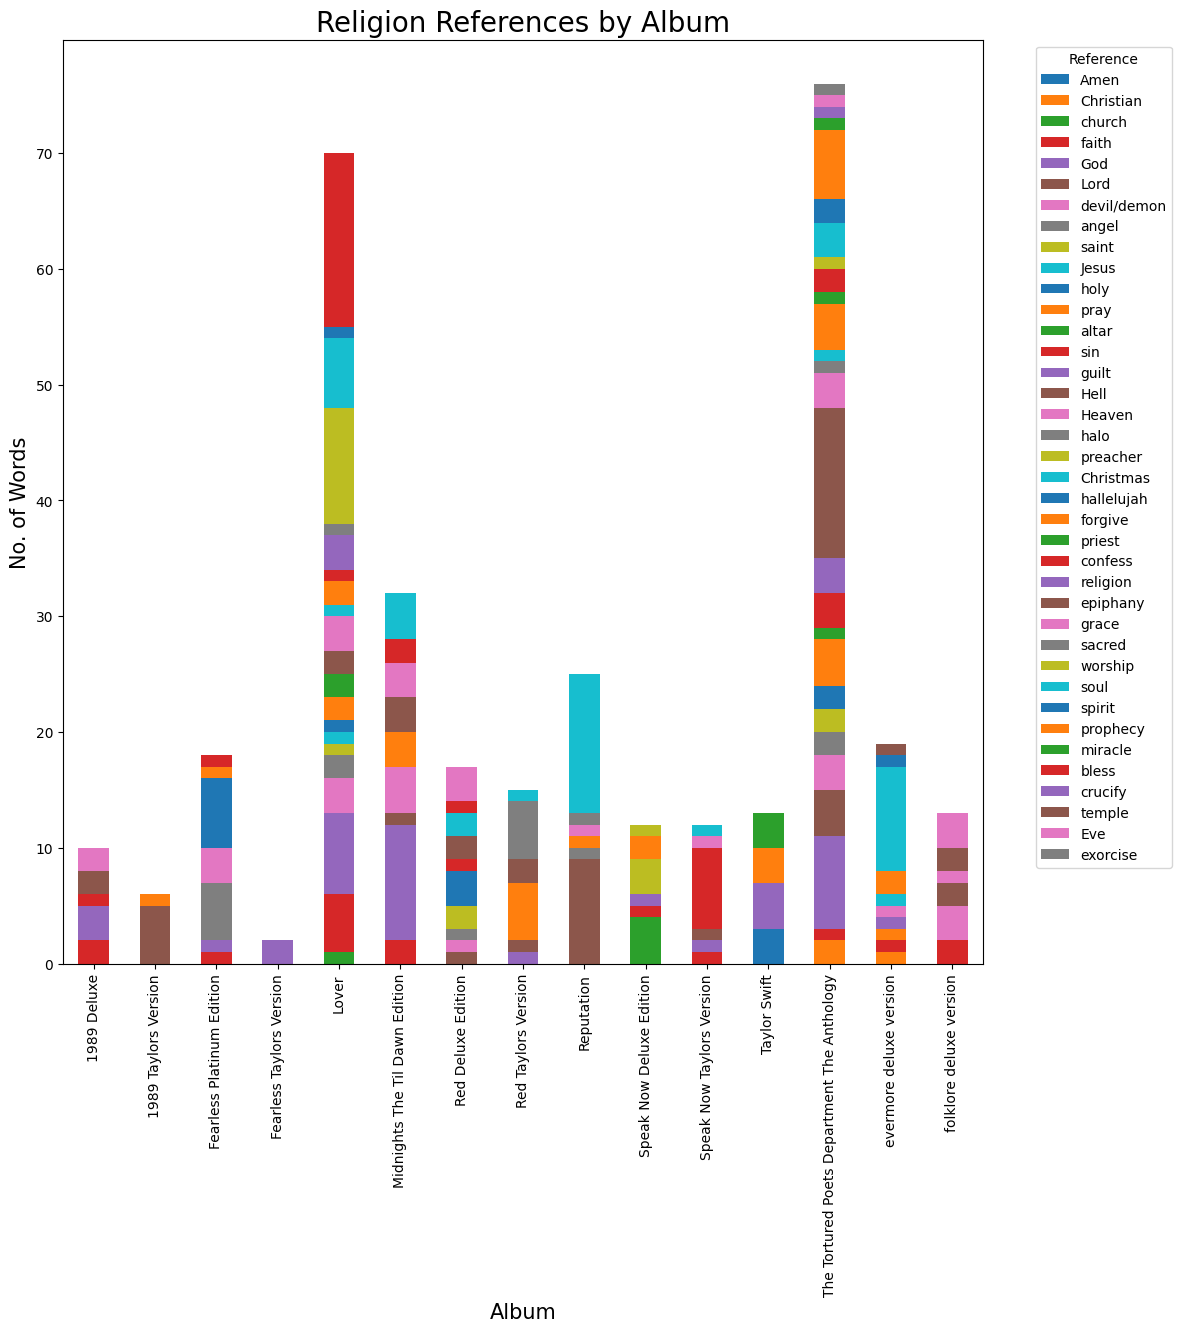

In [48]:
# number of religious words by album color-coded by word

# define data
plotdata = df_rlgn_reduced[['Amen', 'Christian', 'church', 'faith', 'God', 'Lord', 'devil/demon', 'angel', 'saint',
                            'Jesus', 'holy', 'pray', 'altar', 'sin', 'guilt', 'Hell', 'Heaven', 'halo', 'preacher',
                            'Christmas', 'hallelujah', 'forgive', 'priest', 'confess', 'religion', 'epiphany',
                            'grace', 'sacred', 'worship', 'soul', 'spirit', 'prophecy', 'miracle',
                            'bless', 'crucify', 'temple', 'Eve', 'exorcise'
                            ]]

# call function to create static stacked bar graph
plot_stacked_bar_graph(plotdata, 'Reference', 'Religion References by Album', 'No. of Words')

# call function to create interactive stacked bar graph
plot_interactive_bar_graph(df_rlgn_reduced, 'Reference', 'No. of Words', 'Religion References by ALbum')

### Album Titles in Songs

In [49]:
# create new dataframe to find album titles in songs
df_album = df[['Album', 'Song Name', 'Lyrics']].copy()

# create list of album title
# for '1989', 'nineteen' and 'eighty-nine' is accepted
# for 'Lover', 'lover' and the plural is accepted
# for 'Midnights', the singular is accepted
# for 'TTPD', 'poet' and 'poets' is accepted
album_list = ['taylor swift', 'fearless', 'speak now', ' red ', 'nineteen', 'eighty nine', 'reputation', ' lover ',
              ' lovers ', 'folklore', 'evermore', 'midnight', 'midnights', 'the tortured poets department', 'poet', 'poets']

# loop through each string in album_list
# apply find_words function
for col in album_list:
    df_album[col] = df_album['Lyrics'].apply(find_words, pattern=col)
    
df_album.head(2)

,Album,Song Name,Lyrics,taylor swift,fearless,speak now,red,nineteen,eighty nine,reputation,lover,lovers,folklore,evermore,midnight,midnights,the tortured poets department,poet,poets
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# create new reduced dataframe
df_album_reduced = df_album[['Album', 'Song Name', 'Lyrics', 'taylor swift', 'fearless', 'speak now', ' red ', 'nineteen',
                             'eighty nine', 'reputation', ' lover ', ' lovers ', 'folklore', 'evermore', 'midnight', 'midnights',
                             'the tortured poets department', 'poet', 'poets']].copy()

# correct spaces, capitalization, and combine similar  words
df_album_reduced['Taylor Swift'] = df_album_reduced[['taylor swift']]
df_album_reduced['red'] = df_album_reduced[[' red ']]
df_album_reduced['1989'] = df_album_reduced[['nineteen', 'eighty nine']].sum(axis=1)
df_album_reduced['lover'] = df_album_reduced[[' lover ', ' lovers ']].sum(axis=1)
df_album_reduced['midnights'] = df_album_reduced[['midnight', 'midnights']].sum(axis=1)
df_album_reduced['the tortured poets department'] = df_album_reduced[['the tortured poets department', 'poet', 'poets']].sum(axis=1)

# drop now-unnecessary columns
df_album_reduced = df_album_reduced.drop(['taylor swift', ' red ', 'nineteen', 'eighty nine', ' lover ', ' lovers ', 'midnight', 'poet', 'poets'],
                                         axis=1)

df_album_reduced.head(2)

,Album,Song Name,Lyrics,fearless,speak now,reputation,folklore,evermore,midnights,the tortured poets department,Taylor Swift,red,1989,lover
0,Taylor Swift,A Perfectly Good Heart,why would you wanna break a perfectly good hea...,0,0,0,0,0,0,0,0,0,0,0
1,Taylor Swift,A Place In This World,i dont know what i want so dont ask me cause i...,0,0,0,0,0,0,0,0,0,0,0


#### Album Titles in Songs - Bar Graphs

In [51]:
# interactive plot
fig = px.bar(df_album_reduced, x='Album', y=['Taylor Swift', 'fearless', 'speak now', 'red', '1989', 'reputation',
                                             'lover', 'folklore', 'evermore', 'midnights', 'the tortured poets department'],
             labels = {'variable' : 'Album Title',
                       'value' : 'No. of Occurrences'},
             title = 'Album Titles in Songs',
             hover_name = 'Song Name',
             )
fig.show()

### Song Titles in Other Songs